# Network Analysis

We are using the NetworkX Python library for this lecture: http://networkx.github.io/documentation/latest/tutorial/.

In [12]:
import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

import networkx as nx

import seaborn as sns
%matplotlib inline

## Basic graph concepts in NetworkX

### Undirected Graphs

In [22]:
g = nx.Graph()

We can add to the graph one node at a time.

In [23]:
g.add_node(1)

We can also add multiple nodes at once.

In [24]:
g.add_nodes_from([2,3])

Nodes can be objects.

In [25]:
g.add_node('ET')
g.nodes()

NodeView((1, 2, 3, 'ET'))

Nodes can also be removed.

In [26]:
g.remove_node(1)
g.nodes()

NodeView((2, 3, 'ET'))

We can also add edges to the graph.

In [27]:
g.add_edge(1,2)
g.add_edge(3,'ET')
g.add_edges_from([(2,3), (1,3)])
g.edges()

EdgeView([(2, 1), (2, 3), (3, 'ET'), (3, 1)])

In [28]:
g.nodes()

NodeView((2, 3, 'ET', 1))

We can remove edges from a graph.

In [29]:
g.remove_edge(1,2)
g.edges()

EdgeView([(2, 3), (3, 'ET'), (3, 1)])

In [30]:
g.nodes()

NodeView((2, 3, 'ET', 1))

We can obtain the neighbors of a node, as well as the degree of a node.

In [12]:
g.neighbors(1)

In [13]:
g.degree(1)

1

Any NetworkX graph behaves like a Python dictionary with nodes as primary keys.

In [16]:
g.add_node(1, time='05:00')

In [17]:
g.node[1]['time']

'05:00'

In [18]:
g.node[1] # Python dictionary.

{'time': '05:00'}

The special edge attribute `weight` should always be numeric and holds values that are used by NetworkX algorithms requiring weighted edges. 

In [20]:
g.add_edge(1, 2, weight=4.0)

In [21]:
g[1][2]['weight'] = 5.0 # Edge already added.

In [22]:
g[1][2]

{'weight': 5.0}

### Node and edge iterators

In [23]:
for node in g:
    print('nodeid: ', node, '\t degree:', g.degree(node))

nodeid:  2 	 degree: 2
nodeid:  3 	 degree: 3
nodeid:  ET 	 degree: 1
nodeid:  1 	 degree: 2


In [32]:
g.edges(data=True)

EdgeDataView([(2, 3, {}), (3, 'ET', {}), (3, 1, {})])

### Directed graphs

Add the nodes from any container (a list, dictionary, set, or even the lines from a file or the nodes from another graph).

In [33]:
G = nx.DiGraph()
G.add_node(1)
G.add_nodes_from([2,3])
G.add_nodes_from(range(100,110))

H = nx.Graph()
H.add_path([0,1,2,3,4,5,6,7,8,9])

G.add_nodes_from(H)

In [34]:
G.nodes()

NodeView((1, 2, 3, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 0, 4, 5, 6, 7, 8, 9))

The graph object `G` can also be grown by adding edges.

In [35]:
G.add_edge(1, 2)
G.add_edges_from([(1,2),(1,3)])
G.add_edges_from(H.edges())

In [36]:
G.edges()

OutEdgeView([(1, 2), (1, 3), (2, 3), (3, 4), (0, 1), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

### Attributes

Each graph, node, and edge can hold key-value attribute pairs in an associated attribute dictionary (the keys must be hashable). By default these are empty, but they can be added or changed using `add_edge()`, using `add_node()`, or via direct manipulation of the attribute dictionaries (named `graph`, `node`, and `edge`, respectively).

In [37]:
G = nx.DiGraph(day="Friday")
G.graph

{'day': 'Friday'}

Add node attributes using `add_node()`, `add_nodes_from()`, or `G.node`.

In [38]:
G.add_node(1, time='05:00')
G.add_nodes_from([3], time='02:00')
print(G.node[1])
G.node[1]['room'] = 714
del G.node[1]['room'] # Remove attribute.
G.nodes(data=True)

{'time': '05:00'}


NodeDataView({1: {'time': '05:00'}, 3: {'time': '02:00'}})

We can add edge attributes using `add_edge()`, `add_edges_from()`, subscript notation, or `G.edge`.

In [39]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3,4),(4,5)], color='red')
G.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':8})])
G[1][2]['weight'] = 4.7
G.edges(data=True)

OutEdgeDataView([(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 4, {'color': 'red'}), (2, 3, {'weight': 8}), (4, 5, {'color': 'red'})])

Graph objects support many common Python idioms to enable quick inspection and reporting.

In [34]:
1 in G # Check if node in graph.

True

In [35]:
[n for n in G if n < 3] # Iterate through nodes.

[1, 2]

In [36]:
len(G) # Number of nodes in graph.

5

In [37]:
print(G[1]) # Adjacency dict keyed by neighbor to edge attributes.
            # Note: you should not change this dictionary manually!

{2: {'weight': 4.7, 'color': 'blue'}}


We can also iterate over the edges of a graph.

In [40]:
for (n, nbrsdict) in G.adjacency():
    for (nbr, eattr) in nbrsdict.items():
        if 'weight' in eattr:
            print (n,nbr,eattr['weight'])

1 2 4.7
2 3 8


This can also be done using a comprehension.

In [41]:
[ (u,v,edata['weight']) for (u,v,edata) in G.edges(data=True) if 'weight' in edata ]

[(1, 2, 4.7), (2, 3, 8)]

## Visualizing graphs

Visualizing a network can be quite difficult. There are many strategies that are used to draw networks in ways that communicate as much information as possible (while not overwhelming the target audience).

In [61]:
Ggml = nx.read_gml('polblogs.gml')

We are loading a directed network of hyperlinks between weblogs on US politics, recorded in 2005. The data is accessible [here](http://www-personal.umich.edu/~mejn/netdata/).

In [63]:
print(len(Ggml.nodes()))
print(len(Ggml.edges()))

1490
19015


This is a fairly large network to try to visualize. The standard NetworkX routine uses what is called a "spring" layout.   

In such a layout, each edge has a `weight` parameter. The layout routine fixes a spring of that length between the nodes, and a repulsive force between each pair of nodes. It then lets the set of all forces reach its minimum energy state. This is a kind of minimal distortion in a least-squares sense.

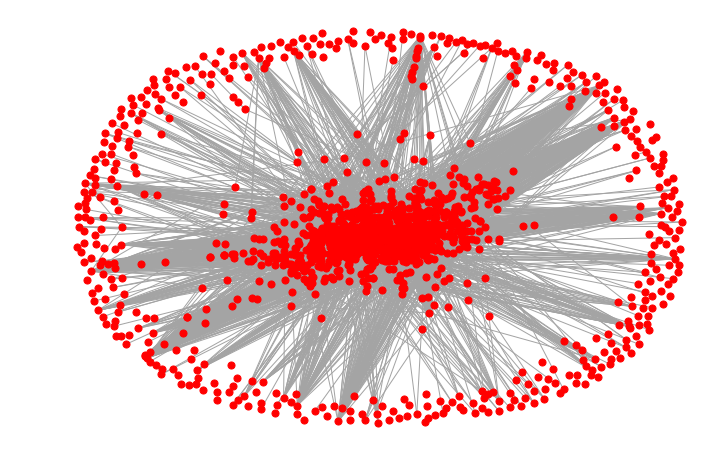

In [45]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(Ggml, edge_color='#a4a4a4', 
                     node_size=50, with_labels=False, arrows=False)
    plt.axis('off')

The other kinds of possible layouts are:
* `circular_layout`: position nodes on a circle
* `random_layout`: position nodes randomly in the unit square
* `shell_layout`: position nodes in concentric circles
* `spectral_layout`: uses the eigenvectors of the graph Laplacian

Note that NetworkX is not intended for use as a sophisticated graph visualization package. There are more sophisticated packages avaiable that do much more. Some examples include:
* [Graphviz](https://www.graphviz.org/)
* [Gephi](https://gephi.org/)
* [Cytoscape](https://cytoscape.org/)

### Identifying clusters

We will consider a graph that models American football games between NCAA Div IA colleges in Fall 2000 (available [here](http://cise.ufl.edu/research/sparse/matrices/Newman/football.html)).

Each vertex represents a football team, which belongs to a specific conference (Big Ten, Conference USA, Pac-10, and so on). 

An edge between two vertices $v_1$ and $v_2$ means that the two teams played each other; the weight of the edge ($v_1$, $v_2$) is equal to the number of times they played each other.

This data is from  M. Girvan and M. E. J. Newman, _Community structure in social and biological networks,_ Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

In [64]:
with open('football.txt', 'r') as f:
   football =  nx.parse_edgelist(f, comments='#', nodetype=int, data=False)

In [65]:
print('This network has {} nodes and {} edges.'.format(len(football.nodes()),len(football.edges())))

This network has 115 nodes and 613 edges.


We will start by creating a visualization with a circular layout.

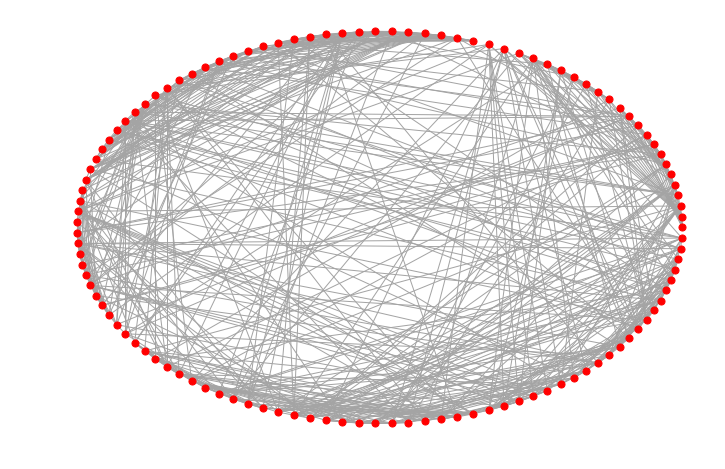

In [66]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(football, pos=nx.circular_layout(football), edge_color='#a4a4a4', node_size=50, with_labels=False)
    plt.axis('off')

We then compare this to the standard spring model layout.

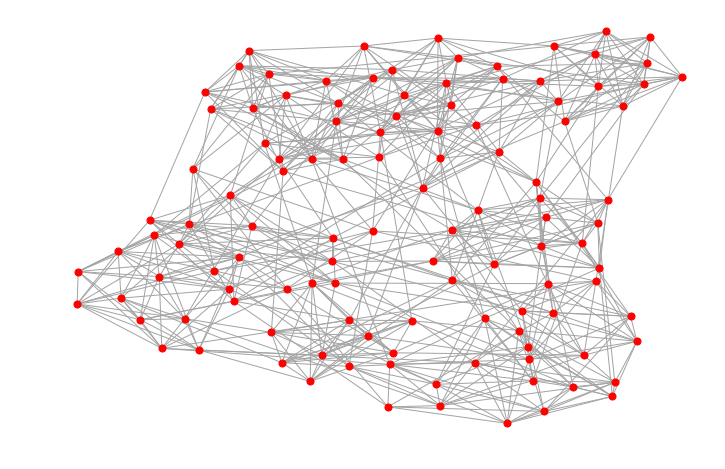

In [67]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(football, edge_color='#a4a4a4', node_size=50, with_labels=False)
    plt.axis('off')

Notice how the spring layout tends to bring clusters of densely connected nodes close to one other.

Finally, we can also construct a visualization that uses the spectral layout,

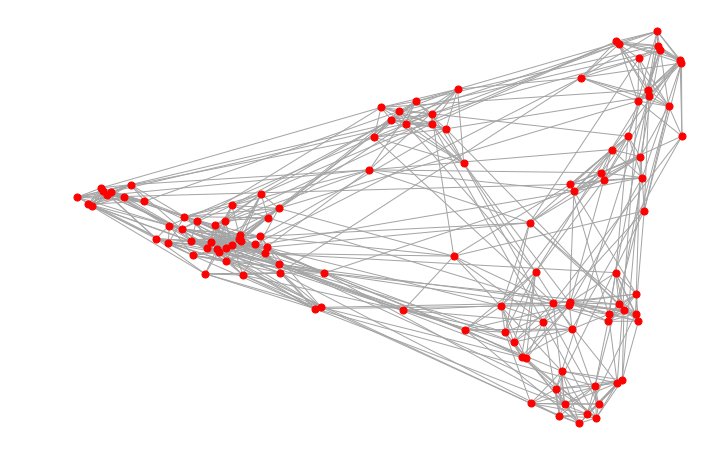

In [50]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(football, pos=nx.spectral_layout(football), edge_color='#a4a4a4', node_size=50, with_labels=False)
    plt.axis('off')

The spectral layout enhances the clustering of densely connected groups.

### Generating graphs (for small data) using the routines already available in Python

NetworkX has a wealth of data-generation routines that can be found here: https://networkx.github.io/documentation/latest/reference/generators.html.

This is the function that generates the [Zachary's Karate club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) network data.

In [51]:
kn = nx.karate_club_graph()

In [52]:
num_nodes = kn.number_of_nodes()
print('number of nodes: ' + str(num_nodes))
num_edges = kn.number_of_edges()
print('number of edges: ' + str(num_edges))

number of nodes: 34
number of edges: 78


We can visualize the network.

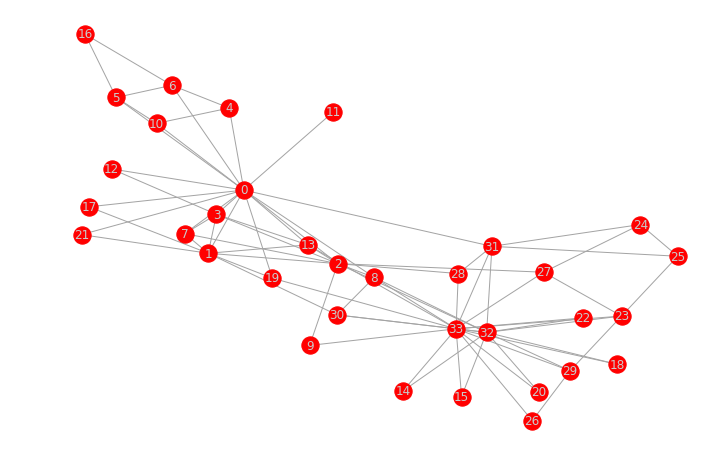

In [53]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(kn, edge_color='#a4a4a4', with_labels=True, font_color='#cacaca')
    plt.axis('off')

number of nodes: 15
number of edges: 20


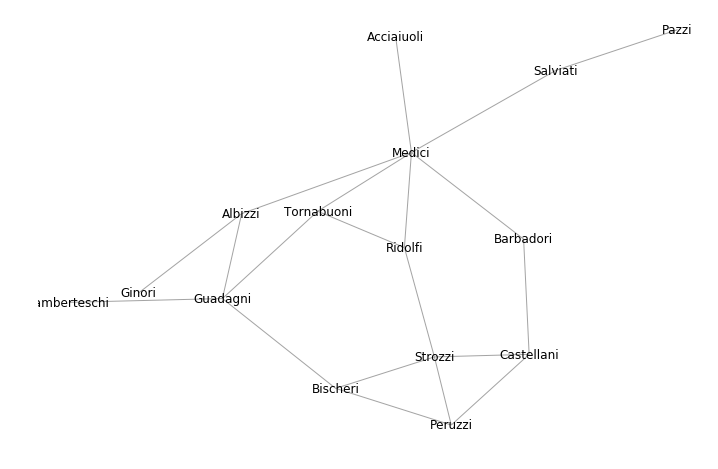

In [54]:
fl = nx.florentine_families_graph()
num_nodes = fl.number_of_nodes()
print('number of nodes: ' + str(num_nodes))
num_edges = fl.number_of_edges()
print('number of edges: ' + str(num_edges))
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(fl, edge_color='#a4a4a4', node_size=0, with_labels=True)
    plt.axis('off')


### Erdos-Renyi random graphs

Erdos-Renyi random graphs have two parameters: 
* the parameter $n$ represents the number of nodes in the graph, and
* the parameter $p$ the probability that any given pair of nodes is connected by an edge.

These graphs are sometimes called $G(n,p)$ graphs.

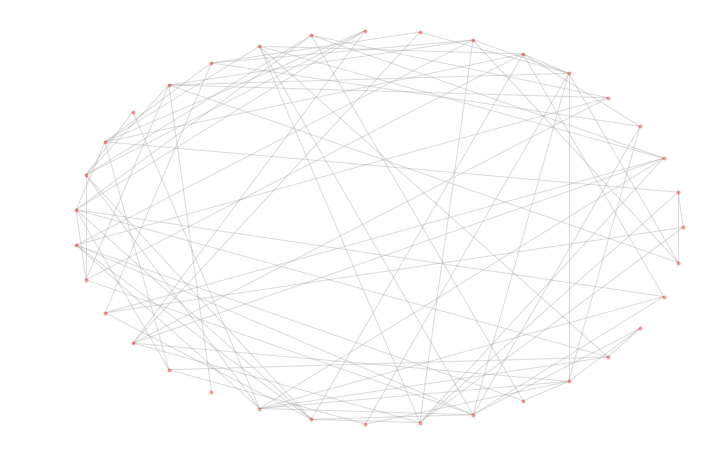

In [55]:
er2=nx.erdos_renyi_graph(35,0.15)
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(er2, node_size=15, edge_color='#a4a4a4', pos=nx.circular_layout(er2), with_labels=False, alpha=.4, linewidths=0)
    plt.axis('off')

We now look at a bigger E-R graph.

In [56]:
er=nx.erdos_renyi_graph(1000,0.15)

In [57]:
er = nx.erdos_renyi_graph(1000,0.15)
print("Number of nodes in the random graph: ", er.number_of_nodes())
print("Number of edges in the random graph: ", er.number_of_edges())

Number of nodes in the random graph:  1000
Number of edges in the random graph:  74994


We can visualize the graph using the spring model.

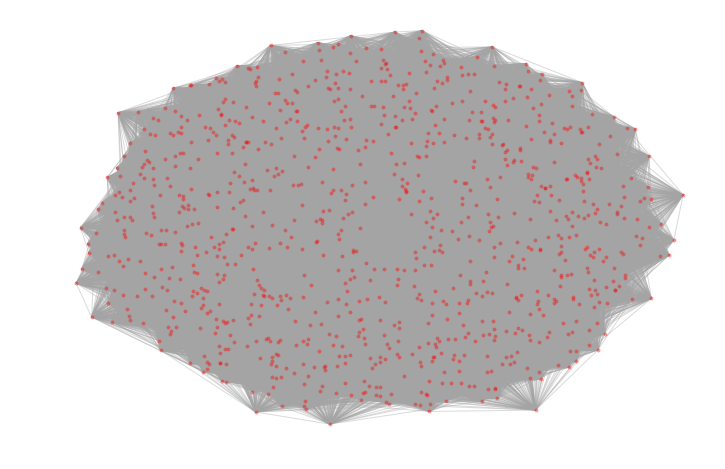

In [58]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(er, node_size=15, edge_color='#a4a4a4', with_labels=False, alpha=.4, linewidths=0)
    plt.axis('off')

Can we observe clusters in this graph?

### Degree distribution

In [59]:
degview = er.degree() 
# This returns an iterable degreeview object.
degree_sequence=[degview[i] for i in range(len(degview))] 
dmax=max(degree_sequence)
dmax

191

Text(0,0.5,'number of nodes')

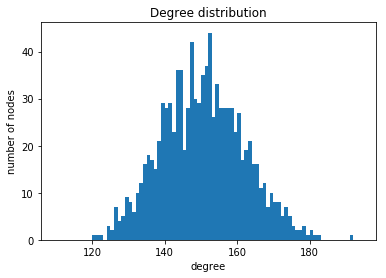

In [60]:
(h,bins,patches) = plt.hist(degree_sequence, bins=range(110,195))
plt.title("Degree distribution")
plt.xlabel("degree")
plt.ylabel("number of nodes")

### Connected Components

Two nodes of a graph belong in the same connected component if there is a path of edges within the graph that connects these two nodes.

In [66]:
cc= nx.connected_components(er)
print(type(cc))
print([len(s) for s in cc])

<class 'generator'>
[1000]


### Clustering coefficient

The **clustering coefficient of a node** is defined as the number of possible triangles centered in this node, divided by the total number of possible triangles in which this node can participate.

Formally, the clustering coefficient of a node $u$ is defined as $$c_u=\frac{2T(u)}{d(u)(d(u)-1)},$$

where $T(u)$ is the number of triangles through node $u$ and $d(u)$ is the degree of node $u$.

For more details for weighted graphs, see: http://networkx.lanl.gov/reference/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering.

The **average clustering coefficient** is the average clustering coefficient of all the nodes in the graph: http://networkx.lanl.gov/reference/generated/networkx.algorithms.cluster.average_clustering.html#networkx.algorithms.cluster.average_clustering.

In [67]:
ccall = nx.clustering(er)
print(ccall)
clustering_coefficient = nx.average_clustering(er)
clustering_coefficient

{0: 0.15022655977692576, 1: 0.146401766004415, 2: 0.15385332215077813, 3: 0.14408404263476726, 4: 0.149743062692703, 5: 0.14807566862361382, 6: 0.15294790135554467, 7: 0.1502329192546584, 8: 0.14966887417218544, 9: 0.1531567024524771, 10: 0.16042351223074114, 11: 0.15500631187296526, 12: 0.15030703826169106, 13: 0.1504535502033156, 14: 0.1532008830022075, 15: 0.14621819449285464, 16: 0.14659836952600822, 17: 0.15152362314788928, 18: 0.14880603267700043, 19: 0.14953551093796824, 20: 0.14795008912655971, 21: 0.14638128060946853, 22: 0.15558019216555802, 23: 0.15284071104914604, 24: 0.1518229639035008, 25: 0.14929480564155487, 26: 0.15414340918849292, 27: 0.14964539007092198, 28: 0.14845663890249877, 29: 0.144489313503398, 30: 0.14968152866242038, 31: 0.1468281631230394, 32: 0.1522884529930807, 33: 0.14701986754966886, 34: 0.15108695652173912, 35: 0.1429854646415156, 36: 0.14464089501548297, 37: 0.15019313792319927, 38: 0.15118340110520279, 39: 0.1546400064500524, 40: 0.14727668845315905,

0.15045810084059758

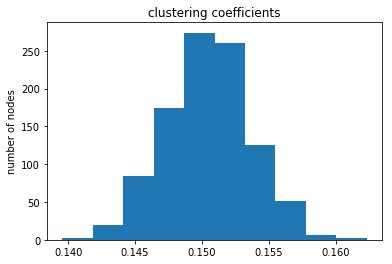

In [68]:
(h,bins,patches) = plt.hist(list(nx.clustering(er).values()))
plt.title('clustering coefficients')
plt.ylabel("number of nodes");

### Triangles

1724


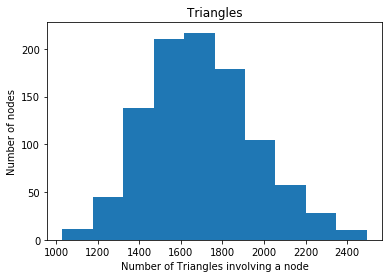

In [69]:
print(nx.triangles(er,0))
#print(nx.triangles(er))
h,bins, patches = plt.hist(list(nx.triangles(er).values()))
plt.title('Triangles')
plt.xlabel("Number of Triangles involving a node")
plt.ylabel("Number of nodes");

### Diameter and average path length

The **diameter** of a graph is defined as the largest shortest path between any two nodes in the graph.

In [70]:
print(nx.diameter(er))

2


The **average shortest path length** of a graph is defined as the average of all shortest path lengths in the graph: http://networkx.lanl.gov/reference/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html.

In [57]:
print(nx.average_shortest_path_length(er))

1.8502842842842844


### Watts-Strogatz graphs

In [79]:
ws = nx.watts_strogatz_graph(500,5,0.1)
print([len(s) for s in nx.connected_components(ws)])

[500]


#### Degree distribution

In [72]:
degview = ws.degree()
degree_sequence= [degview[i] for i in range(len(degview))]
dmax=max(degree_sequence)
dmax

7

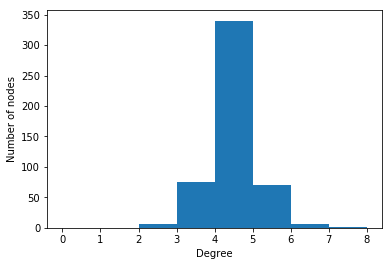

In [73]:
(h,bins,patches) = plt.hist(degree_sequence,bins=range(9))
plt.xlabel("Degree")
plt.ylabel("Number of nodes");

#### Clustering coefficient

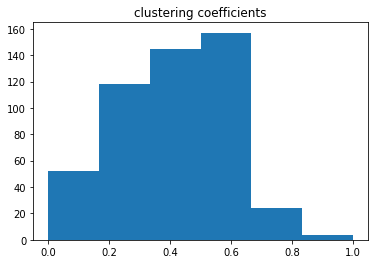

In [74]:
(h,bins,patches) = plt.hist(list(nx.clustering(ws).values()),bins=6)
plt.title('clustering coefficients');

#### Average path length and diameter

In [75]:
print('Diameter:', (nx.diameter(ws)))
print('Average shortest path length:', (nx.average_shortest_path_length(ws)))
print('Average clustering coefficient:', (nx.average_clustering(ws)))

Diameter: 14
Average shortest path length: 7.168488977955912
Average clustering coefficient: 0.3490380952380952


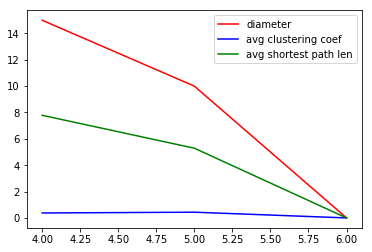

In [77]:
r = range(4,7)
d = np.zeros(len(r))
cc = np.zeros(len(r))
pl = np.zeros(len(r))
index = 0
for i in r:
    ws=nx.watts_strogatz_graph(500,i,0.1)
    d[index] = nx.diameter(ws)
    cc[index] = nx.average_clustering(ws)
    pl[index] = nx.average_shortest_path_length(ws)
    index=+1
plt.plot(r,d,'r',label='diameter')
plt.plot(r,cc,'b',label='avg clustering coef')
plt.plot(r,pl,'g',label='avg shortest path len')
plt.legend(loc='best');


In [ ]:
r = np.logspace(-5.,-1.,50)
d = np.zeros(len(r))
cc = np.zeros(len(r))
pl = np.zeros(len(r))
index = 0
for i in  r:
    ws=nx.watts_strogatz_graph(100,6,i)
    d[index] = nx.diameter(ws)
    cc[index] = nx.average_clustering(ws)
    pl[index] = nx.average_shortest_path_length(ws)
    index=+1
plt.plot(np.log10(r),pl/d,'r',label='avg shortest path len')
plt.plot(np.log10(r),cc,'b',label='avg clustering coef')
plt.legend(loc='best');

In [65]:
r

array([1.00000000e-05, 1.20679264e-05, 1.45634848e-05, 1.75751062e-05,
       2.12095089e-05, 2.55954792e-05, 3.08884360e-05, 3.72759372e-05,
       4.49843267e-05, 5.42867544e-05, 6.55128557e-05, 7.90604321e-05,
       9.54095476e-05, 1.15139540e-04, 1.38949549e-04, 1.67683294e-04,
       2.02358965e-04, 2.44205309e-04, 2.94705170e-04, 3.55648031e-04,
       4.29193426e-04, 5.17947468e-04, 6.25055193e-04, 7.54312006e-04,
       9.10298178e-04, 1.09854114e-03, 1.32571137e-03, 1.59985872e-03,
       1.93069773e-03, 2.32995181e-03, 2.81176870e-03, 3.39322177e-03,
       4.09491506e-03, 4.94171336e-03, 5.96362332e-03, 7.19685673e-03,
       8.68511374e-03, 1.04811313e-02, 1.26485522e-02, 1.52641797e-02,
       1.84206997e-02, 2.22299648e-02, 2.68269580e-02, 3.23745754e-02,
       3.90693994e-02, 4.71486636e-02, 5.68986603e-02, 6.86648845e-02,
       8.28642773e-02, 1.00000000e-01])

#### Experimenting with Barabasi-Albert graphs  http://networkx.lanl.gov/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html

In [66]:
ba=nx.barabasi_albert_graph(500,5)
print([len(s) for s in nx.connected_components(ba)])

[500]


We can examine the degree distribution.

In [67]:
degview = ba.degree()
degree_sequence= [degview[i] for i in range(len(degview))]
dmax=max(degree_sequence)
dmax

78

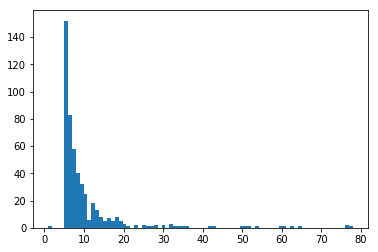

In [68]:
h,bins,patches = plt.hist(degree_sequence,bins=dmax)

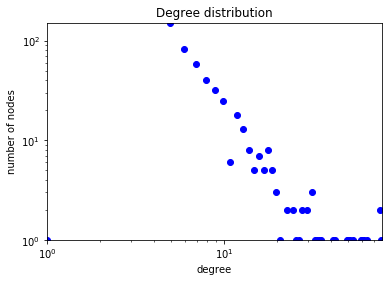

In [69]:
hmax=max(h)
plt.axis([1,dmax,1,hmax]) # set ranges
#x=compress(h,bins)    # remove bins with zero entries
#y=compress(h,h)       # remove corresponding entries
x=bins.compress(h)
y=h.compress(h)
plt.loglog(x,y,'bo')
plt.title("Degree distribution")
plt.xlabel("degree")
plt.ylabel("number of nodes")
plt.show()